## Imports

In the following cells, we import necessary libraries and modules that will be used throughout the notebook. These include:

- `timeit` for timing the execution of code snippets.
- `List` and `Optional` from the `typing` module for type hinting.
- `numpy` as `np` for numerical operations.
- `pandas` as `pd` for data manipulation and analysis.
- `matplotlib.pyplot` as `plt` for plotting graphs.

These imports are essential for performing search algorithms, running experiments, and visualizing the results.

In [ ]:
import timeit
from typing import List, Optional
import matplotlib.pyplot as plt
import pandas as pd
'''
import cProfile
import pstats
'''

## `linearSearch()` Function

### Description
The `linearSearch()` function performs a linear search on a list of integers to find the target integer. It iterates through each element in the list and returns the index of the target if found. If the target is not found, it returns `None`.

### Parameters
- `arr` (*List[int]*): The list of integers to search through.
- `target` (*int*): The integer value to search for in the list.

### Returns
- (*Optional[int]*): The index of the target integer if found, otherwise `None`.

In [ ]:
def linearSearch(arr: List[int], target: int) -> Optional[int]:
    """Performs linear search on a list of integers (arr) for an int (target)."""

    # loops through the list and returns the index of the target if found
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return None

## `binarySearch()` Function

### Description
The `binarySearch()` function performs a binary search on a sorted list of integers to find the target integer. It repeatedly divides the search interval in half and compares the middle element with the target. If the target is found, it returns the index of the target. If the target is not found, it returns `None`.

### Parameters
- `arr` (*List[int]*): The sorted list of integers to search through.
- `target` (*int*): The integer value to search for in the list.

### Returns
- (*Optional[int]*): The index of the target integer if found, otherwise `None`.

In [5]:
def binarySearch(arr: List[int], target: int) -> Optional[int]:
    """Performs binary search on a sorted list of integers (arr) for an int (target)."""

    # sets the low and high values to the first and last index of the list
    low = 0
    high = len(arr) - 1

    # loops through the list and returns the index of the target if found
    while low <= high:
        # calculates the middle index
        mid = (low + high) // 2
        # checks if the mid value is the target and returns the index if true
        if arr[mid] == target:
            return mid
        # if the mid value is less than the target and adjusts the low value
        elif arr[mid] < target:
            low = mid + 1
        # if the mid value is greater than the target and adjusts the high value
        else:
            high = mid - 1
    return None

## `exponentialSearch()` Function

### Description
The `exponentialSearch()` function performs an exponential search on a sorted list of integers to find the target integer. It starts by checking the first element and then repeatedly doubles the index until it finds a range where the target might be. It then performs a binary search within that range.

### Parameters
- `arr` (*List[int]*): The sorted list of integers to search through.
- `target` (*int*): The integer value to search for in the list.

### Returns
- (*Optional[int]*): The index of the target integer if found, otherwise `None`.

In [6]:
def exponentialSearch(arr: List[int], target: int) -> Optional[int]:
    """Performs exponential search on a sorted list of integers (arr) for an int (target)."""

    # checks if the first value is the target
    if arr[0] == target:
        return 0
    i = 1
    # loops through the list and doubles the index until the target is found if there
    while i < len(arr):
        # checks if the index value is the target 
        if arr[i] == target:
            return i
        i *= 2
        # if the element at the index is greater than the target
        # performs binary search on the sublist
        if arr[i] <= target:
            return binarySearch(arr[:min(i, len(arr))], target)
    return None

## `runExperiment()` Function

### Description
The `runExperiment()` function runs timing experiments for different search algorithms (linear search, binary search, and exponential search) and writes the results to a CSV file. It measures the execution time of each search algorithm on lists of varying sizes and records the results.

### Parameters
- None

### Returns
- None

### Details
- The function creates a CSV file named `searchTimes.csv` and writes the header with columns for list size and the execution times of the three search algorithms.
- It defines four different setups for lists of sizes \(10^3\), \(10^4\), \(10^5\), and \(10^6\).
- For each setup, it generates a random list of integers and a random target value.
- It sorts the list for binary and exponential search.
- It measures the execution time of each search algorithm using the `timeit` module and records the minimum time from 10 trials.
- The results are written to the CSV file, which is then closed.

In [ ]:
def runExperiment() -> None:
    """Runs timing experiments for different search algorithms and writes results to a CSV file."""

    # creates a CSV file called searchTimes.csv and writes the header
    CSV = open("searchTimes.csv", "w")
    CSV.write("List Size, Linear Search(sec), Binary Search(sec), Exponential Search(sec)\n")

    numTrials = 10

    SETUP1 = '''
range = 2**31 - 1
size = 10**3
from __main__ import linearSearch, binarySearch, exponentialSearch
from random import randint
import numpy as np
import cProfile
import pstats

# creates a random array of integers and a random target value
arr = np.random.randint(0, range, size).tolist()
target = np.random.choice(arr)

# sorts the array for binary and exponential search
sortedArr = sorted(arr)
    '''
    SETUP2 = '''
range = 2**31 - 1
size = 10**4
from __main__ import linearSearch, binarySearch, exponentialSearch
from random import randint
import numpy as np
import cProfile
import pstats

# creates a random array of integers and a random target value
arr = np.random.randint(0, range, size).tolist()
target = np.random.choice(arr)

# sorts the array for binary and exponential search
sortedArr = sorted(arr)
    '''
    SETUP3 = '''
range = 2**31 - 1
size = 10**5
from __main__ import linearSearch, binarySearch, exponentialSearch
from random import randint
import numpy as np
import cProfile
import pstats

# creates a random array of integers and a random target value
arr = np.random.randint(0, range, size).tolist()
target = np.random.choice(arr)

# sorts the array for binary and exponential search
sortedArr = sorted(arr)
    '''
    SETUP4 = '''
range = 2**31 - 1
size = 10**6
from __main__ import linearSearch, binarySearch, exponentialSearch
from random import randint
import numpy as np
import cProfile
import pstats

# creates a random array of integers and a random target value
arr = np.random.randint(0, range, size).tolist()
target = np.random.choice(arr)

# sorts the array for binary and exponential search
sortedArr = sorted(arr)
    '''
    
    setups = [SETUP1, SETUP2, SETUP3, SETUP4]
    sizes = [10**3, 10**4, 10**5, 10**6]

    for i in range(len(setups)):
        setup = setups[i]
        # times the linear, binary, and exponential search functions
        linearTime = min(timeit.repeat(stmt = "linearSearch(arr, target)", setup = setup, number = 1, repeat = numTrials))
        binaryTime = min(timeit.repeat(stmt = "binarySearch(sortedArr, target)", setup = setup, number = 1, repeat = numTrials))
        expTime = min(timeit.repeat(stmt = "exponentialSearch(sortedArr, target)", setup = setup, number = 1, repeat = numTrials))


        # Get the correct size from setupSizes
        size = sizes[i]

        # writes the results to the CSV file
        CSV.write("%d,%e,%e,%e\n" % (size, linearTime, binaryTime, expTime))

    # closes the CSV file
    CSV.close()

## Experiments and Plots

### Description
In this section, we run the `runExperiment()` function to perform timing experiments for different search algorithms (linear search, binary search, and exponential search). The results are saved in a CSV file named `searchTimes.csv`. We then read the CSV file into a pandas DataFrame and plot the performance of the search algorithms.

### Steps
1. **Run Experiments**: The `runExperiment()` function is executed to generate the timing data for the search algorithms and store it in `searchTimes.csv`.
2. **Read CSV File**: `searchTimes.csv` is read into a pandas DataFrame.
3. **Plot Data**: The data is plotted using `matplotlib` to visualize the performance of the search algorithms.

### Code Explanation
- **Run Experiments**: The `runExperiment()` function is called to generate the timing data and save it to `searchTimes.csv`.
- **Read CSV File**: The CSV file is read into a pandas DataFrame `df`.
- **Plot Data**: The data is plotted using `matplotlib`:
  - A figure of size 10x6 is created.
  - The list size is plotted on the x-axis, and the execution times for the search algorithms are plotted on the y-axis.
  - The x-axis and y-axis are set to a logarithmic scale.
  - The plot is customized with titles, labels, a legend, and a grid.
  - The plot is saved as an image file `search_performance.png` and displayed.

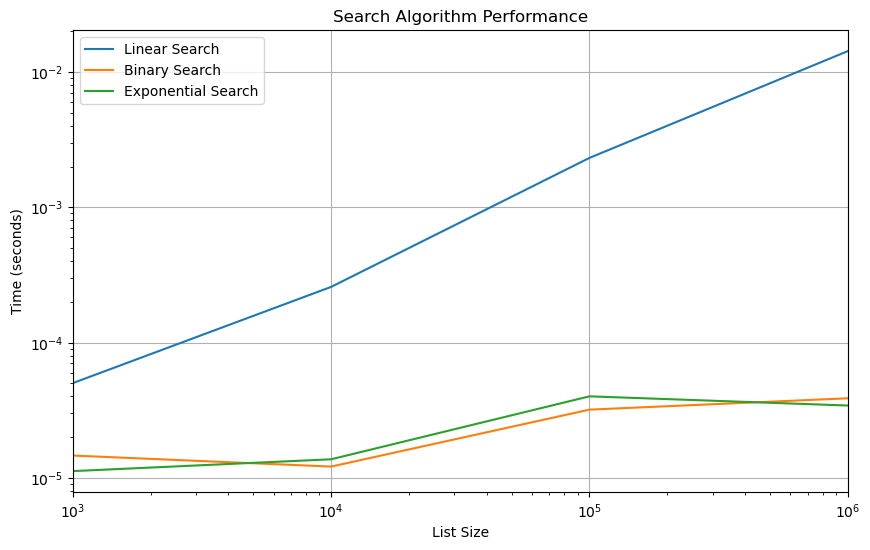

In [ ]:
runExperiment()

### CODE MADE BY COPILOT, COMMENTED BY AARON STANGE ###
# Reads our .CSV file which contains the data to be graphed
df = pd.read_csv("searchTimes.csv")

# Plots the data for our 3 search algorithms
# Create 10:6 a plot
plt.figure(figsize=(10, 6))
# first argument is the x-axis data points(size of the list), 
# second is the y-axis(times for search algoritms),
# third is the label is for said line(name of algorithm)
plt.plot(df["List Size"], df[" Linear Search(sec)"], label="Linear Search")
plt.plot(df["List Size"], df[" Binary Search(sec)"], label="Binary Search")
plt.plot(df["List Size"], df[" Exponential Search(sec)"], label="Exponential Search")

# Add titles/labels and scales our graph(makes it all fancy)
plt.title("Search Algorithm Performance")
plt.xlabel("List Size")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**3, 10**6)
plt.legend()
plt.grid(True)

# Saves the plot as an image file and displays it
plt.savefig("search_performance.png")
plt.show() 


# code to profile, took too long to run even when doing 1 trial(stopped it at about 5000 seconds)
'''
# Saves the plot as an image file and displays it
plt.savefig("search_performance.png")
plt.show()

# Profile the main function
cProfile.run('main()', 'timing_profile')

# Create a Stats object
p = pstats.Stats('timing_profile')

# Sort the statistics by cumulative time and print the top 3 functions
p.sort_stats('cumulative').print_stats(3)
'''